# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


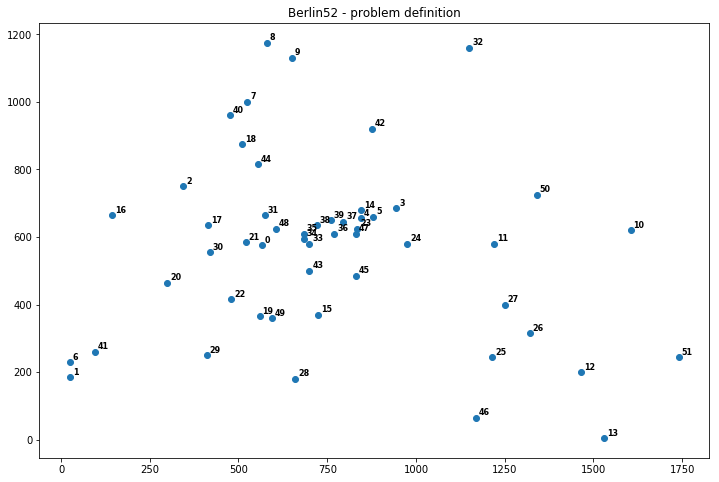

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

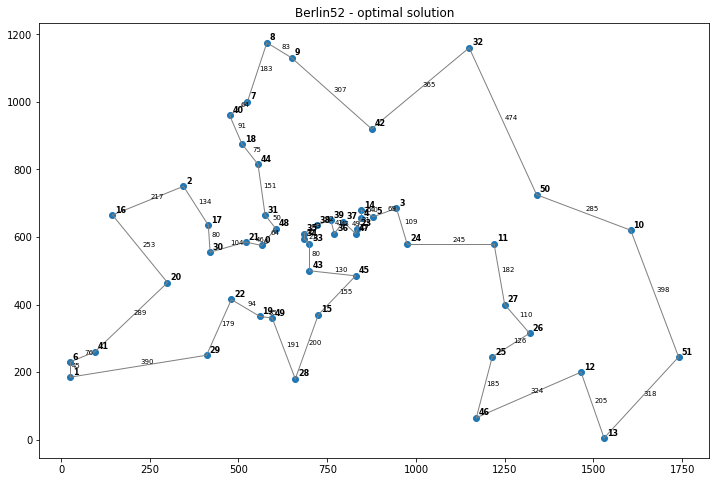

In [4]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [6]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [8]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

57.7023184299469
21402.086072854014 [38 17  4 20 41  6 22 27 26 11 51 12 46 39 45 10 50 24 33 35 13 15 16  7
  9 23 29 34  0  2 40 49 36  1 19 37 31 48 32 43 14  3 47  5 42  8 30 21
 28 25 18 44]


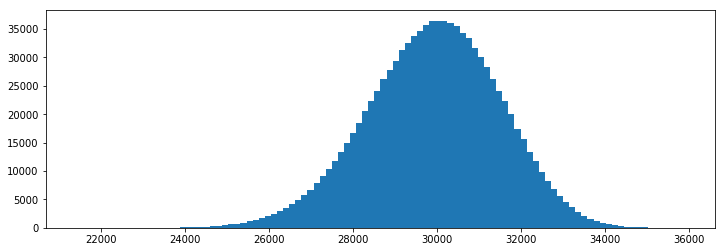

29914.39496276467 1579.5850300608904


In [9]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [10]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [11]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

53.13345384597778 9184.20706643973


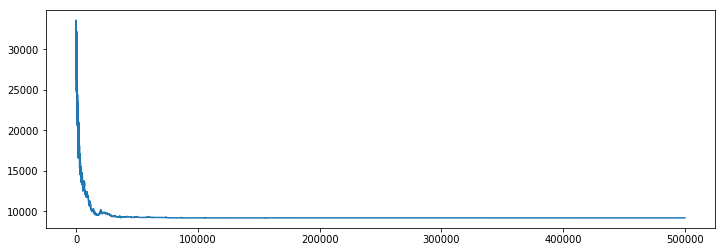

In [12]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

In [13]:
def PMX(ind1, ind2):
    print(ind1)
    print(ind2)
    # TODO

    return ind1, ind2

In [14]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [15]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

best_objective_value = np.Inf
best_chromosome = np.zeros((1, chromosome_length))

# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])

    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]

    # recording some statistics
    if best_objective_value < objective_values[0]:
        best_objective_value = objective_values[0]
        best_chromosome = current_population[0, :]

    print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

[48  0 50 38  8 10  3 28 15 19 47 16 42 41 37 49 22 35 39 46 12 43 26 25
 24 23  9 34 40 30  5  2 32 31 13  6 20 21 29 44 18 14  1  7 36 45 51 27
 33 11 17  4]
[19 48 18 21 49 35 28 12 16 14 20 51 46 26  0 15 45 22 33 37 50 44  1 17
  8 32  9 42 34 39  5  6 24 23 41 29 38 47 25 43 10 11  3  4 36 13 40  2
 31 30 27  7]
[30  6 23 35 46 33 34 29 14 45  4 32 22 24 51 15  8 27 26 36  7  9 31 49
 40 48 41 16 13 50  1 38 25 44 47 42 11 20 19 18 43 39  2 12 28  3  0 17
 37  5 10 21]
[11 27  5 22 26 16 43 32 31 45 49 15 29 36 25 42  8 19 17 38 44  7 37 12
 28 46  2 21 34  1 35 51 30 23 48 50 13 20 24 40 33 14 47  4 41  6  0 18
  3  9 10 39]
[ 0  7  5 43 14  2 16 25 15  9 17 31 42 33 10 22 32 45 30  6 29 13  3 34
  4 24  1 18 50 44 40 41 23 35 27 26 36  8 37 51 49 28 46 39 20 12 48 19
 38 47 21 11]
[50 33 43  6 48 51 40 39 24 36 21 31 10 35 47  4 11 22  2 37 12  1 27 17
  5 41 44 14 46 34 15 49 20 19 26 23  3 16  0 25 30 42 13 32 38 45 29 18
 28  8  9  7]
[ 9 47 48 30  7  8 50 31 28  1 37 18 16 

[48 45  9 16 25 11 27 50 15 46 13 51 19 23 21  2 37  7 26 18  4  6 39  1
  0 47 31 36 20 17 43 40  3  8 29  5 24 41 30 28 38 42 32 14 33 49 10 12
 22 34 35 44]
[21 41 16 19 34 30 11 46 29  0 15 36 18  7  1 20 22 48 13 47 38 23  5 24
  4 25 27 28 31  2 43  3 45  9  6 44 12 37 51 40 14 10 35 17 49 42 39  8
 32 50 26 33]
[19 14  9 17 29 24 51 40 32 31 18  6 16  8 22 39  4 47 46 48 25 30 15 35
 13 10  7 28 11 27  2 34 33 43 50 12 23  3 37 21 45 44  0 20 42 49  1 41
 36  5 38 26]
[10 30 20 18  1 33 35 43 23 19 22 15 13 40 45 47 42 38  7 46  0 36 11 31
  3 14 12 26 39 41 24 29  9  5 28 27 17 16  2 44 49 48  6 34 32  4 51  8
 21 37 50 25]
[37 21 18 39 11 17 40  8 46 20 16 45 44 10 14 22 23 43 19  4 24 25 41  0
 50 13 26 51  2 28 29 27  7 35  6  1  5 36  3 15 47 42 32 33 31 38  9 48
 49 34 30 12]
[26 51 28 27  9 42 21 25 45  5 48 19 20 47 35 16 31 33 12 15 22 30 14 29
 32 13  3 38 44 10 24  1  4  6 17 11  8 46 50 23 18  2 40  0 34 49 41 43
 39 37  7 36]
[18 28 21 43  6 38 24  3 16 39 34  9 12 

[39 46 13 12 40 17 15 11  3 44 18 38 50 23 25  2 21  1 29  0 45 28 20 33
 36 16  9 32 27 10 47 14 41 51 42 37 26 43  5 19 35  7 30 22 34 49 31  8
 48  4 24  6]
[44 40 28 48  9  7  0 36 16  2 21  6 23 29 25 14 17 13 12  3  8  1 39 50
 10 45 37  4 20 43 30 22 41 46 26 32 51 19 11 42  5 35 38 24 15 18 49 31
 33 34 27 47]
[37 21 18 39 11 17 40  8 46 20 16 45 44 10 14 22 23 43 19  4 24 25 41  0
 50 13 26 51  2 28 29 27  7 35  6  1  5 36  3 15 47 42 32 33 31 38  9 48
 49 34 30 12]
[18  6 40 35 36 14 49 39 19 12 17 42  8 27 24  7 31 30 28 21 38  9  0 29
 41  1 44 37 33 15 16 45 43  2 32 48 13 46  4 50  3 23 11 25 51  5 26 10
 47 20 34 22]
[17 48 40 38 25 24 45 18 20 19  9 10 26 47  3 31 34 13 23 27  6  7 16 29
 43  5 14 41 30  0 39 42 36 44  4 15  1  2 37 51 12 33  8 11 46 28 22 49
 21 32 35 50]
[30 31 42 22 23 40 14 36 44 16 10 33  6 29 28  7  9 26 19 45 37 34 18  4
  2 48 50  0  1 21 47  3 41 27  5 12 13 39 11 32 38 43 46 25 24 20 49 35
  8 51 15 17]
[39 46 13 12 40 17 15 11  3 44 18 38 50 

  2     0.66612816 23976.42316661 25913.91068318 26631.37649399 621.31187197
[18  6 40 35 36 14 49 39 19 12 17 42  8 27 24  7 31 30 28 21 38  9  0 29
 41  1 44 37 33 15 16 45 43  2 32 48 13 46  4 50  3 23 11 25 51  5 26 10
 47 20 34 22]
[44 40 28 48  9  7  0 36 16  2 21  6 23 29 25 14 17 13 12  3  8  1 39 50
 10 45 37  4 20 43 30 22 41 46 26 32 51 19 11 42  5 24 38 35 15 18 49 31
 33 34 27 47]
[39 46 13 12 40 17 15 11  3 44 18 38 50 23 25  2 21  1 29  0 45 28 20 33
 36 16  9 32 27 10 47 14 41 51 42 37 26 43  5 19 35  7 30 22 34 49 31  8
 48  4 24  6]
[21 41 16 19 34 30 51 37 12 44  6  9 45  3 43  2 31 28 27 25  4 24  5 23
 38 47 13 48 22 20  1  7 18 36 15  0 29 46 11 40 14 10 35 17 49 42 39  8
 32 50 26 33]
[15 14 49 23  9  5 36 39 44 37  3 35 34 26 32 21 30 51 50 27 24  4 42 47
  8 22 41 29  1 43 12 38 48 20 25 28 18  0 11 40 16 17  6 46 33 45 19  2
 31  7 10 13]
[15 14 49 23  9  5 36 39 44 37  3 35 34 26 32 21 30 51 50 27 24  4 42 47
  8 22 41 29  1 43 12 38 48 20 25 28 18  0 11 40 1

 37 33 34 17]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 22  1  6 20 15 45 19 16 32 50 24  5 36 48 40 44  7 21 27 26  2 18 25  8
 42 51 30 43]
[ 9 33 44 48  4 30  7 36 50 18 27 13 38 37 47 11 12 35 34  3 24 42 20  5
  0 40 15 32  8 19 17 23 51 45 28 21 22 49 41 25 16  6  1 43 31 29  2 26
 10 46 39 14]
[18  6 40 35 36 14 49 39 19 12 17 42  8 27 24  7 31 30 28 21 38  9  0 29
 41  1 44 37 33 15 16 45 43  2 32 48 13 46  4 50  3 23 11 25 51  5 26 10
 47 20 34 22]
[39 46 13 12 40 17 15 11  3 44 18 38 50 23 25  2 21  1 29  0 45 28 20 33
 36 16  9 32 27 10 47 14 41 51 42 37 26 43  5 19 35  7 30 22 34 49 31  8
 48  4 24  6]
[36 24 28 48 45 12  0 35 47 40 13 46 26  6  5 27 51 50  4 25  1 39  7  9
 16 41 44  3 15 38 18 42 10 32 43 19 49 22 31  2 11 30 21 29 20 14 23  8
 37 33 34 17]
[ 9 33 44 48  4 30  7 36 50 18 27 13 38 37 47 11 12 35 34  3 24 42 20  5
  0 40 15 32  8 19 17 23 51 45 28 21 22 49 41 25 16  6  1 43 31 29  2 26
 10 46 39 14]
[21 41 16 19 34 30 11 46 2

 11  2 31 42]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 25 18  2 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[33  3 38 17  9  6  1 22 46 28 36  7 44  8  0 48 49 23 40 21 30 20 34 41
 29 47 12 14 10  5 19  4 24 39 26 27 37 25 51 13 43 16 45 18 15 32 50 35
 11  2 31 42]
[44  6 16  0  8 15 36 40  2 46 17 41 12  9 34 38  7 45 49 29 19  5 24  4
 33 11 23 18 48 30  3 28 37 51 50 47 35 14 32 13 26 31 39 25 10 27 42 43
  1 20 22 21]
[33  3 38 17  9  6  1 22 46 28 36  7 44 31  2 11 35 50 32 15 18 45 16 43
 13 51 25 37 27 26 39 24  4 19  5 10 14 12 47 29 41 34 20 30 21 40 23 49
 48  0  8 42]
[33  3 38 17  9  6  1 22 46 28 36  7 44  8  0 48 49 23 40 21 30 20 34 41
 29 47 12 14 10  5 19  4 24 39 26 27 37 25 51 13 43 16 45 18 15 32 50 35
 11  2 31 42]
[36 24 28 48 45 12  0 35 50 51 27  5  6 26 46 13 40 47  4 25  1 39  7  9
 16 41 44  3 15 38 18 42 10 32 43 19 49 22 31  2 11 30 21 29 20 14 23  8
 37 33 34 17]
[33  3 38 17  9  6  1 22 4

[38 15 39 41  2 36  5 45 35 42 34 44  9  1 28 14 24 12 25 27  7 51 49 21
 20 43 19 47 30  6 33 16  3  0 32 50 11 46 26 10 13  4 37 48 18 40 29  8
 17 22 31 23]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 25 18  2 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[33  3 38 17  9  6  1 22 46 28 36  7 44  8  0 48 49 23 40 21 30 20 34 41
 29 47 35 50 32 15 18 45 39 26 27 37 25 51 13 43 16 24  4 19  5 10 14 12
 11  2 31 42]
[38 15 39 41  2 36  5 45 35 42 34 44  9  1 28 14 24 12 25 27  7 51 49 21
 20 43 19 47  0  3 16 33  6 30 32 50 11 46 26 10 13  4 37 48 18 40 29  8
 17 22 31 23]
[39 46 13 12 51 41 14 47 10 27 32  9 16 36 33 20 28 45  0 29  1 21  2 25
 23 50 38 18 44  3 11 15 17 40 42 37 26 43  5 19 35  7 30 22 34 49 31  8
 48  4 24  6]
[39 46 13 12 51 41 14 47 10 27 32  9 16 36 33 20 28 45  0 29  1 21  2 25
 23 50 40 17 15 11  3 44 18 38 42 37 26 43  5 19 35  7 30 22 34 49 31  8
 48  4 24  6]
[46 10 31 17 33 13 41 14 39 37  0 29  4 

[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 25 18  2 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0  1  6 20 15 45 19 16 32 50 24  5 36 23
 49  9  3 11 35 47 28 12 51 42  8 25 18  2 26 27 21  7 44 40 48 38 34  4
 29 22 30 43]
[17 31 10 46 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 16 32 50 24  5 36 48 40 44  7 21 27 26  2 18 25 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 16 32 50 24  5 36 48 40 44  7 21 27 26  2 18 25 19 45 15 20  6
  1 22 30 43]
[33  3 38 17  9  6  1 22 46 28 36  7 44  8  0 48 49 23 40 21 30 20 34 41
 29 47 12 14 10  5 19  4 24 39 26 27 37 25 51 13 43 16 45 18 15 32 50 11
 35  2 31 42]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 16 32 50 24  5 36 48 40 44  7 21 27 26  2 18 25 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 

  6     1.71719217 22394.51322180 23792.77603339 23976.42316661 259.56018043
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 43 30
 22  1  6 20 15 45 19 16 32 50 24  5 36 48 40 44  7 21 27 26  2 18 25  8
 42 51 12 28]
[46 10 31 17 33 28 47 35 11  3  9 49 23 38 34  4 29  0 37 39 14 41 13 12
 51 42  8 25 18  2 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 25  8 42 51 12 28 47 35 11  3  9
 49 23 38 34 18  2 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 5

  7     1.94739008 21546.27473987 23331.45897691 23738.16160981 492.71882491
[39 46 13 12 51 15 11  3 44 18 38 50 23 25  2  8 31 30 22 34 49  7 35 19
  5 43 26 37 42 40 17 41 14 47 10 27 32  9 16 36 33 20 28 45  0 29  1 21
 48  4 24  6]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 25 18  2 16 32 50 24  5 36 48 40 44  7 21 27 26 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 25 18  2 43 30 22  1  6 20 15 45 19 16 32 50 24  5 36 48 40 44
  7 21 27 26]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8 25 18  2 16 32 50 24  5 36 48 40 44  7 21 27 26 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  7 21 27 26 25 18
  2  8 42 51 12 28 47 35 11  3 44 40 48 36  5 24 5

[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  7 21 27 26 25 18
  2  8 42 51 12 28 47 35 11  3 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42 32 50 24  5 36 48 40 44  7 21 27 26 25 18  2  8 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 44  7 21 27 26 25 18  2  8 42 51 12 28 47 35 11  3
  9 49 23 38 34  4 29  0 37 39 14 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 

  9     2.35840178 20302.07564126 22297.24187195 22394.51322180 225.11839879
[46 10 31 17 33 13 41 14 39 37  0 29 24 50 32 42 51 12 28 47 35 11  3  9
 49 23 38 34  4  5 36 48 40 44  7 22  1  6 20 15 45 19 16  8  2 18 25 26
 27 21 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37 49 23 38 34  4 29  0  9  3 11 35 47 28 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41  7 21 42  8  2 18 25 26 27 51 12 28 47 35 11  3  9
 49 23 38 34  4 29  0 37 39 14 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 4

  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  7 21 27 26 25 18
  2  8 42 51 12 28 47 35 11  3 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 18  2  8 42 51 12 28 47 35 11  3  9 49 23 38 34  4 29  0 17 33 13
 41 14 39 37 31 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42  8  2 18 25 26 27 21  7 32 50 24  5 36 48 40 44 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41  7 21 42  8  2 18 25 26 27 51 12 28 47 35 11  3  9
 49 23 38 34  4 29  0 37 39 14 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41  7 21 42  8  2 18 25 26 27 51 12 28 47 35 11  3  9
 49 23 38 34  4 29  0 37 39 14 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 3

  1 22 30 43]
[46 10 31 17 33 28 47 35 11  3  9 49 23 38 34  4 29  0 37 39 14 41 13 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42 32 50 24  5 36 48 40 44  7 21 27 26 25 18  2  8 16 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 42 32 50 24  5 36 48 40 44  7 21 27 26 25 18  2  8 16 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 28 47 35 11  3  9 49 23 38 34  4 29  0 37 39 14 41 13 12
 51 42  8  2 18 25 26 27 21  7 44 40 48 36  5 24 50 32 16 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 51 12 28 14 3

[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 26
 27 51 12 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 45 19 21  7 44 40 48 36  5 24 50 32 16 42  8  2
 18 25 26 27 51 12 28 47 35 11  3  9 49 23 38 34  4 29  0 37 39 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 27 26 25 46 10 31 17 33 13 

[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 29  0 37 39 14 41 31  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 31 17 33 13 41 14 39 37  0 29  4 

[46 10 13 33 17 31 41 14 39 37  0 29 49 23 38 34  4  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 17 31
 41 14 39 37 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29 49 23 38 34  4  9  3 11 35 48 36  5
 24 50 32 16 42  8  2 18 12 51 27 26 25 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29 49 23 38 34  4  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 33 17 29  0 37 39 14 41 31  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 10 13 41 31 17 33 14 39 37  0 29  4 34 38 23 49  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11 

 14     3.63484073 18136.40185500 19596.64079925 20110.76593563 449.93686681
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 30 22  1  6
 20 15 45 43]
[46 10 31 17 33 28 47 35 11  3  9  8 42 49 23 38 34  4 29  0 37 39 14 41
 13 12 51 27 26 25 18  2 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[46 25 26 27 51 12 28 47 35 11  3  9  4 34 38 23 49 29  0 37 39 14 41 31
 17 33 13 10 18  2  8 42 16 32 50 24  5 36 48 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 39
 14 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 39
 14 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 39
 14 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 4

[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 17 31
 41 14 39 37 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 39
 14 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 39
 14 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 39
 14 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 28 47 40 44  7 21 19 45 15 20 39 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[46 10 13 33 17 31 41 14 39 37  0 29 49 23 38 34  4  9  3 11 35 47 28 12
 51 27 26 25 18  2  8 42 15 45 19 21  7 44 40 48 36  5 24 50 32 16 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11 

 16     4.10954809 18087.33215888 18656.88140286 18760.08413450 155.07581706
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 28 47 40 44  7 21 19 45 15 20 39 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41 39 14 37  0 29
 49 23 38 34  4  9  3 11 35 48 36  5 24 50 32 16 42  8  2 18 30 22  1  6
 20 15 45 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 39 14 41 31 17  0 29
 49 23 38 37 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 47 28 12 51 27 26 25 46
 10 13 33 17 31 41 14 39 37  0 29 49 23 38 34 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 17 31
 41 14 39 37 33 13 10 46 25 26 27 51 12 28 47 40 4

[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 17 31
 41 14 39 37 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11 37  0 29 49 23 38 34  4  9  3 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 28 12
 51 27 26 25 46 10 13 33 17 31 41 39 14 37 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 17 31
 41 14 39 37 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11 

[18  2  8 42 16 32 50 40 44  7 21 19 45 15 20 39 14 37  0 29 49 23 38 34
  4  9  3 11 35 48 36  5 24 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11 37  0 29 49 23 38 34  4  9  3 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 33 13 10 46 25 26 27 51 12 28 47 40 44  7 21 19 45 15 20 39 14 37
  0 29 49 23 38 34  4  9  3 11 35 48 36  5 24 50 32 16 42  8 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11 

 19     4.76422262 17360.89206736 18094.01059453 18136.40185500  90.39193784
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 39
 14 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41 20  6
  1 22 30 43]
[18  2  8 42  9  3 11 35 48 36  5 24 50 32 16  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21 30 22  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 47
 40 44  7 43]
[18  2  8 42  7 21 19 45 15 20 39 14 37  0 29 49 23 38 34  4  9  3 11 35
 48 36  5 24 50 32 16 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 31 17 33 13 10 46 25 26 27 51 12 28 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 4

  1 22 30 43]
[18  2  8 42  3 11 35 48 36  5 24 50 32 16  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  4 34 38 23 49 29  0 17 31
 41 14 39 37 33 10 13 46 25 26 27 51 12 28 43 30 22  1  6 20 15 45 19 21
  7 44 40 47]
[18  2  8 42  9  3 11 35 48 36  5 24 50 32 16  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 19 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42  9  3 11 35 48 36  5 24 50 32 16  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  

 21     5.23326969 16883.16323335 17646.70235730 17857.52284849 188.92594772
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 19 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 19 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42  3 11 35 48 36  5 24 50 32 16  9  4 34 38 23 49 29  0 37 14
 39 20 15 45 19 21  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 19 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4 47 40 44  7 23 49 29  0 37 14 39 20 15 45 42  8
 32 50 24  5 36 48 35 11  3  9 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2  8 42 16 32 50 24  5 36 48 35 11  3  9  7 21 19 45 15 20 39 14 37
  0 29 49 23 38 34  4 44 40 47 28 10 46 25 26 27 5

[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 16  2 18  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39
 14 37  0 29 49 23 47 40 44  7 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 19 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 19 45 15 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 28 47 40  7 44 23 49 29  0 37 

[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 16  2 18  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 48 35 40 44  7 18
  2 16 42  8 32 50 24  5 36 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21  0 37 14 39 20
 15 45 19 29 49 23  7 40 44 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39
 14 37  0 29 49 23 47 40 44  7 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4  9  3 11 35 48 

  1 22 30 43]
[18  2 16 19 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21  0 37 14 39 20
 15 45 19 29 49 23  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39
 14 37  0 29 49 23 47 40 44  7 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21  0 37 14 39 20
 15 45 19 29 49 23  7 40 44 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 16  2 18  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39
 14 37  0 29 49 23 47 40 44  7 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 20 15 45 42  8 3

 25     6.14351821 16349.51718547 16849.58202332 16967.70464849  83.73717478
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 16  2 18  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 33 13 10 46 25 26 27 51 12 28 47 40 44  7 18  2 16 17 31 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4  9 40 44  7 23 49 29  0 37 14 39 20 15 45 42  8
 32 50 24  5 36 48 35 11  3 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 35 11  3  9  4 34 38 21 19 45 15 20 48 36  5 24 50
 32  8 42 16  2 18  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 48 35 36  5 24 50
 32  8 42 16  2 18  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 20 15 45 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 19 39
 14 37  0 29 49 23  7 44 40 47 28 12 51 27 26 25 4

[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 16  2 18  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21  0 37 14 39 20
 15 45 19 29 49 23  7 40 44 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21  0 37 14 39 20
 15 45 19 29 49 23  7 40 44 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
 26     6.41239309 16349.51718547 16772.82489690 16883.16323335 109.66148672
[18  2 16 19 21 38 34  4  9 40 44  7 23 49 29  0 37 14 39 20 15 45 42  8
 32 50 24  5 36 48 35 11  3 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 48 35 40 44  7 18
  2 16 42  8 32 50 24  5 36 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29 30 22  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7
 18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 3

[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 16  2 18  7 44 40 35 48 11
  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29 30 22  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7
 18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 19 45 15 20 39
 14 37  0 43]
[23 49 29  0 37 14 39 20 15 45 19 33 13 10 46 25 26 27 51 12 28 47 40 44
  7 18  2 16 42  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 35 11  3  9  4 34 38 21 19 45 15 20 48 36  5 24 50
 32  8 42 16  2 18  7 44 40 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 16  2 18  7 44 40 43 30 22  1  6 41 31 17 33 13 10 46 25 26 27
 51 12 28 47]
[18  2 16 19 21 38 34  4  9 40 44  7 23 49 29  0 37 14 39 20 15 45 42  8
 32 50 24  5 36 48 35 11  3 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 

[15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 16  2 18 31 17
 33 13 10 46 25 26 27 51 12 28 47 40 44  7 23 49 29  0 37 14 39 20 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4  9 40 44  7 23 49 29  0 37 14 39 20 15 45 42  8
 32 50 24  5 36 48 35 11  3 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15 20 40
  7 44 23 37  0 29 49 14 39 47 28 12 51 27 26 25 46 10 13 43 30 22  1  6
 41 31 17 33]
[18  2 16 19 21 38 34  4  9 40 44  7 23 49 29  0 37 14 39 20 15 45 42  8
 32 50 24  5 36 48 35 11  3 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 16  2 18  7 44 40 35 48 11
  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16 19 21 38 34  4  9 40 44  7 23 49 29  0 37 14 39 20 15 45 42  8
 32 50 24  5 36 48 35 11  3 47 28 12 51 26 27 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32 

[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 16  2 18  7 44 40 35 48 11
  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 33 13 10 46 25 26 27 51 12 28 47 40 44  7 18  2 16 17 31 41  6
  1 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28  7 44 40 47 23 49
 29  0 37 14 39 20 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15
 19 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 16  2 18  7 44 40 35 48 11
  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 33 13 10 46 25 26 27 51 12 28 47 40 44  7 18  2 16 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 20 15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 33 13 10 46 25 26 27 51 12 28 47 40 44  7 18  2 16 17 31 41  6
  1 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 

[23 49 29  0 21 38 34  4 24 50 32  8 42 37 14 39 20 15 45 19 16  2 18  7
 44 40 35 48 11  3  9  5 36 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[15 45 19 21 38 34  4  9  3 11 35 48  7 44 40 47 28 12 51 27 26 25 46 10
 13 33 17 31 18  2 16 42  8 32 50 24  5 36 23 49 29  0 37 14 39 20 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 16  2 18  7 44 40 35 48 11
  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 16  2 18  7 44 40 35 48 11
  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 16  2 18  7 44 40 35 48 11
  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 16  2 18  7 44 40 35 48 11
  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46 10 13 33 17 31 41  6
  1 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 

[18  2 16  1  6 41 20 39 14 37  0 29 49 23 47 40 44  7 28 13 10 46 25 26
 27 51 12 33 17 31 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15
 19 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 33 13 10 46 25 26 27 51 12
 28 20 15 45 19 21 38 34  4  9  3 11 48 35 40 44  7 18  2 16 17 31 41  6
  1 22 30 43]
[18  2 16  1  6 41 20 39 14 37  0 29 49 23 47 40 44  7 28 13 10 46 25 26
 27 51 12 33 17 31 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15
 19 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28  7 44 40 42  8 32
 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39 14 37  0 29 49 23 47 45 15
 19 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 33 13 10 46 25 26 27
 51 12 28 20 15 45 19 21 38 34  4  9  3 11 48 35 40 44  7 18  2 16 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9 44 40  7 23 49 29 19 45 15
 43  0 21 38 34  4 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 22 30
 37 14 39 20]
[18  2 16  1  6 41 31 17 33 13 10 46 25 

 19 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 33 13 10 46 25 26 27
 51 12 28 20 15 45 19 21 38 34  4  9  3 11 48 35 40 44  7 18  2 16 41  6
  1 22 30 43]
[18  2 16  1  6 41 20 39 14 37  0 29 49 23 47 40 44  7 28 13 10 46 25 26
 27 51 12 33 17 31 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15
 19 22 30 43]
[18  2 16  1  6 41 20 39 14 37  0 29 49 23 47 40 44  7 28 13 10 46 25 26
 27 51 12 33 17 31 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15
 19 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9 44 40  7 23 49 29 19 45 15
 43  0 21 38 34  4 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 22 30
 37 14 39 20]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9 44 40  7 23 49 29 19 45 15
 43  0 21 38 34  4 47 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 22 30
 37 14 39 20]
[15 45 19 21 38 34  4 48 35 11  3  9  7 44 40 47 28 12 51 27 26 25 46 10
 13 33 17 31 18  2 16 42  8 32 50 24  5 36 23 49 29  0 37 14 39 20 41  6
  1 22 30 43]
[18  2 16  1  6 41 20 39 1

[15 45 19 21 17 33 13 10 46 25 26 27 51 12 28 47 40 44  7  9  3 11 35 48
  4 34 38 31 18  2 16 42  8 32 50 24  5 36 23 49 29  0 37 14 39 20 41  6
  1 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28  7 44 40 42  8 32
 50 24  5 36 48 35 11  3  9  4 34 38 21 20 43 30 22 19 15 45 47 23 49 29
  0 37 14 39]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28  7 44 40 42  8 32
 50 24  5 36 48 35 11  3  9  4 34 38 21 20 43 30 22 19 15 45 47 23 49 29
  0 37 14 39]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28  7 44 40 42  8 32
 50 24 11 35 48 36  5  3  9  4 34 38 21 20 39 14 37  0 29 49 23 47 45 15
 19 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28  7 44 40 42  8 32
 50 24  5 36 48 35 11  3  9  4 34 38 21 20 43 30 22 19 15 45 47 23 49 29
  0 37 14 39]
[15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 16  2 18 31 17
 30 22  1  6 41 20 49 29  0 37 14 39 23  7 44 40 47 28 12 51 27 26 25 46
 10 13 33 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 

[18  2 16  1  6 41 20 39 14 37  0 29 49 23 47 40 44  7 28 12 51 27 26 25
 46 13 10 33 17 31 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 45 15
 19 22 30 43]
[18  2 16  1  6 41 31 17 30 22 19 15 45 47 23 49 29  0 37 14 39 20 21 38
 34  4  9  3 11 35 48 36  5 24 50 32  8 42 40 44  7 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 33 13 10 46 25 26 27
 51 12 28 20 15 45 19 21 38 34  4  9  3 11 48 35 40 44  7 18  2 16 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 33 13 10 46 25 26 27
 51 12 28 20 15 45 19 21 38 34  4  9  3 11 48 35 40 44  7 18  2 16 41  6
  1 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 33 13 10 46 25 26 27
 51 12 28 20 45 15 19 21 38 34  4  9  3 11 48 35 40 44  7 18  2 16 41  6
  1 22 30 43]
[18  2 16 42  8 32 50 24  5 36 48 35 11  3  9 44 40  7 23 49 29 19 45 15
 43  0 21 38 34  4 47 28 12 51 27 26 25 46 13 10 33 17 31 41  6  1 22 30
 37 14 39 20]
[23 49 29  0 37 14 39 47 36  5 24 50 32 

[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24  3  9  4 34 38 21 19 45 15 20 28 12 51
 27 26 25 46 10 13 33 17 31 42  8 32 50 11 48 35 40 44  7 18  2 16 41  6
  1 22 30 43]
[15 45 47 23 49 29  0 37 14 39 20 21 38 34  4  9  3 11 35 48 36  5 24 50
 32  8 42 40 44  7 31 17 33 13 10 46 25 26 27 51 12 28 41  6  1 16  2 18
 19 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 29 49 23 47 45 15
 19 22 30 43 20 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 40 44  7
  0 37 14 39]
[18  2 16  1  6 41 28 12 51 27 26 25 46 10 13 33 17 31  7 44 40 42  8 32
 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39 14 37  0 29 49 23 47 45 15
 19 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32 

[15 45 19 21 38 34  4  9  3 11 35 48 36  5 24 50 32 42  8 16  2 18 31 17
 30 22  1  6 41 20 49 29  0 37 14 39 23  7 44 40 47 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[18  2 16  1  6 41 28 12 51 27 26 25 46 10 13 33 17 31  7 44 40 42  8 32
 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39 14 37  0 29 49 23 47 45 15
 19 22 30 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 29 49 23 47 45 15
 19 22 30 43 20 21 38 34  4  9  3 11 35 48 36  5 24 50 32  8 42 40 44  7
  0 37 14 39]
[18  2 16  1  6 41 20 39 14 37  0 29 49 23 47 40 44 43 30 22 19 15 45 42
  8 32 50 24  5 36 48 35 11  3  9  4 34 38 21 31 17 33 10 13 46 25 26 27
 51 12 28  7]
[18  2 16  1  6 41 28 12 51 27 26 25 46 10 13 33 17 31  7 44 40 42  8 32
 50 24  5 36 48 35 11  3  9  4 34 38 21 20 39 14 37  0 29 30 22 19 15 45
 47 23 49 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32 

 36     8.64544606 14886.13312384 15358.23683571 15490.80884330  80.58094626
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39  4  9  3 11 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 24  5 36 47 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[18  2 16  1  6 41 20 39 14 37  0 29 49 23 47 40 44  7 28 12 51 27 26 25
 46 13 10 50 24  5 36 48 35 11  3  9  4 34 38 21 31 17 33 32  8 42 45 15
 19 22 30 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 2

[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[40 35 48  0 29 49 23 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6 41 16  2
 18  7 44 40 35 48 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[37 14 39 20 21 38 34  4  9  3 11 35 48 

  0 37 14 39]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 29 49 23 47 45 15
 19 22 30 43 20 21 38 34  4  9  3 24  5 36 48 35 11 50 32  8 42 40 44  7
  0 37 14 39]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 29 49 23 47 45 15
 19 22 30 43 20 21 38 34  4  9  3 24  5 36 48 35 11 50 32  8 42 40 44  7
  0 37 14 39]
[23 49 29  0 37 14 39  4  9  3 11 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 24  5 36 47 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 29 49 23 47 45 15
 19 22 30 43 20 21 38 34  4  9  3 24  5 36 48 35 11 50 32  8 42 40 44  7
  0 37 14 39]
[15 45 19 21 38 34  4  9  8 42 32 50 24  5 36 48 35 11  3 16  2 18 31 17
 30 22  1  6 41 20 49 29  0 37 14 39 23  7 44 40 47 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 48 35 40 44  

[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42 38 34  4  9  3 11 48 35 40
 44  7 18  2 16 41  6  1 22 30 17 31 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[42  8 32 50 11 35 48 36  5 24  3  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 29 49 23 47 45 15
 19 22 30 43 20 21 38 34  4  9  3 24  5 36 48 35 11 50 32  8 42 40 44  7
  0 37 14 39]
[18  2 16  1  6 41 31 17 33 13 10 46 25 26 27 51 12 28 29 49 23 47 45 15
 19 22 30 43 20 21 38 34  4  9  3 24  5 36 48 35 11 50 32  8 42 40 44  7
  0 37 14 39]
[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 

[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 48 35 40 44  7 18  2 16 41 

[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 38 34  4  9  3 11 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6
 41 16  2 18  7 44 40 35 48  0 29 49 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[42  8 32 50 11 35 48 36  5 24  3  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 50 32  8 42  9  3 11 48 35 40 44  7 18
  2 16 41  6  1 22 30 17 31  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 

 10 13 33 43]
[42  8 32 50 11 35 48 36  5 24  3  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 3

[23 49 29  0 37 14  4  9  3 11 50 32  8 42 31 17 30 22  1  6 41 16  2 18
  7 44 40 35 48 24  5 36 47 39 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[42  8 32 50 11 35 48 36  5 24  3  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[23 49 29  0 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  8 32 50 24
  5 36 47 39 14 37 11  3  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 13 10 46 25 26 27 51 12 28
 20 15 33 43]
[42  8 32 50 11 35 48 36  5 24  3  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[23 38 34  4  9  3 11 37 14 39 47 36  5 24 50 32  8 42 31 17 30 22  1  6
 41 16  2 18  7 44 40 35 48  0 29 49 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 

[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[42  8 32 50 11 35 48 36  5 24  3  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[42  8 32 50 11 35 48 36  5 24  3  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 46 25 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14  4  9  3 11 50 32  8 42 31 17 30 22  1  6 41 16  2 18
  7 44 40 35 48 24  5 36 47 39 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 

 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[42  8 32 50 11  3 24  5 36 48 35  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44 42 31 17 30 22  1  6 41 16
  2 18  7  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 3

 44    10.86721587 14065.47288455 14611.91687932 14660.88893497  83.01144749
[42  8 32 50 11 35 33 13 10 46 25 26 27 51 12 28 29 49 23 47 45 15 19 22
 30 43 20 21 38 34  4  9  3 24  5 36 48 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[42  8 32 50 11  3 24  5 36 48 35  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 2

 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[42  8 32 50 11  3 24  5 36 48 35  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[15 45 19 21 38 34  4  9  3 11 50 32  8 42 31 17 30 22  1  6 41 16  2 18
  7 44 40 35 48 24  5 36 47 39 14 37 23 49 29  0 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 36 47 39 14 37 23  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 15 45 19 20 28 12 51 46 25 26 27
 10 13 33 43]
 45    11.14045548 13895.9

[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  3 11 50 32  8 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[42  8 32 50 11  3 24  5 36 48 35  9  4 34 38 21 20 43 30 22 19 15 45 47
 23 49 29 28 12 51 27 26 25 46 10 13 33 17 31 41  6  1 16  2 18 40 44  7
  0 37 14 39]
[23 38 34  4  9  3 11 37 14 39 47 36  5 

[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  9  3 11 50 32  8 42 31 17
 30 22  1  6 41 16  2 18  7  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[23 49 29  0 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  3 11 50 32  8 42  9  4 34 38 21 19 45 15 20 28 12 51 46 25 26 27
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 

[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 39 14 37 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  8 32 50 11  3  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 

[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 28 20 15 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 

 49    12.19827390 13439.43647516 13960.83733267 14065.47288455  98.23119548
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24  4 42  3 11 50 32  8  9 31 17 30 22  1
  6 41 16  2 18  7 44 40 35 48 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 2

[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 44 40  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 44 40  7 18  2 16 41  6  1 22 30
 17 31  9  3 11 50 32  8 42  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24  4 42  3 11 50 32  8  9 31 17 30 22  1
  6 41 16  2 18  7 44 40 35 48 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 

 51    12.68692589 13301.72753263 13609.25956977 13895.97440631 142.44863704
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 27 26 25 46
 13 10 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 20 15
 45 19 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 27 26 25 46
 10 13 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 20 15
 45 19 21 38 34  4 42  3 11 50 32  8  9 31 17 30 2

 52    12.91549754 13301.72753263 13478.44163357 13587.89123781  60.25692720
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11 13 10 46 25 26 27 51 12 28 20 15 45 19 21 38 34  4
 42  3 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 2

[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11 13 10 46 25 26 27 51 12 28 20 15 45 19 21 38 34  4
 42  3 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 

[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 18  7 44  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 24  5 36 47 39 14 37 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11 13 10 46 25 26 27 51 12 28 20 15 45 19 21 38 34  4
 42  3 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 

[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 43 33 27 26 25 46 10 13 51 12 28
 20 15 45 19 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2
 18  7 44 40]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31  9  8 32 50 11  3 42  4 34 38 21 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 27 26 25 46 10 13 51 12 28 20 15 45 19 21 38 34  4  9  8 32 50
 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44 40 35 48 24  5 36 47 39 14
 37 23 33 43]
[ 0 29 49 27 26 25 46 10 13 51 12 28 20 15 45 19 21 38 34  4  9  8 32 50
 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44 40 35 48 24  5 36 47 39 14
 37 23 33 43]
[ 0 29 49 27 26 25 46 10 13 51 12 28 20 

[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30
 17 31 42  3 11 50 32  8  9  4 34 38 21 20 15 45 19 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 29 49 19 45 15 20  1  6 41 16  2 18  7 44 40 35 48 24  5 36 47 39 14
 37 23 43 33 13 10 46 25 26 27 51 12 28 22 30 17 31  9  8 32 50 11  3 42
  4 34 38 21]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 

 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 5

[ 0 21 38 34  4  9  8 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50
 32 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4  9  8 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50
 32 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50
 32 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24 27 26 25 46 10 13 51 12 28 20 15 45 19 29 49 23 37 14 39 47
 36  5 33 43]
[ 0 21 38 34  4  9  8 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50
 32 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 

 36  5 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24 27 26 25 46 10 13 51 12 28 20 15 45 19 29 49 23 37 14 39 47
 36  5 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 41  6  1 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24 27 26 25 46 10 13 51 12 28 20 15 45 19 29 49 23 37 14 39 47
 36  5 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 45 19 29 49 23 37 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 5

[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34 35 48 24  5 36 47 39 40 44  7 18  2 16 41  6  1 22 30 17 31
 42  3 11 50 32  8  9  4 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 

 41  6  1 20]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 40
 44 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34 48 35 40 44  

[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 20 28 12 51 13 10 46 25
 26 27 33 43]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
 61    15.08800244 12407.36759876 12737.52196724 12782.78537517  69.81211259
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 40
 44 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 4

 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 37 14 39 47 36 23 49 29 19 45 15 43 33 27 26 25 46 10 51
 13 12 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 51
 13 12 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 5

[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 20  1  6 41 16  2 18  7 44 40 35 48 24  5 36 47 39
 14 37 23 49]
[21  0 38 34 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13 51
 12 28 22 30 17 31 42  3 11 50 32  8  9  4  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32
  8  9  4 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 34 38 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[21  0 38 34 24  5 36 47 39 14 37 23 49 

[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[21  0 38 34  4  9  8 32 50 11  3 24  5 36 47 39 14 37 23 49 29 19 45 15
 43 33 27 26 25 46 10 13 51 12 28 22 30 17 31 42 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 34 38 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[21  0 38 34  4  9  8 32 50 11  3 42 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34 48 35 40 44  7 18  2 16 41 

[21  0 38 34 36 47 39 14 31 17 30 22 28 12 51 13 10 46 25 26 27 33 43 15
 45 19 29 49 23 37 42  3 11 50 32  8  9  4  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 46 25 26
 27 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 33 43 15 45 19
 29 49 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 34 38 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 34 38 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 39 47 36  5 24 14 37 23 49 29 19 15 45 43 33 27 26 25 46 10 51
 13 12 28 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 

 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 33 43 15 45 19
 29 49 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 34 38 24  5 36 47 39 14 37 23 49 29 28 12 51 13 10 46 25 26 27 33 43
 15 45 19 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 34 38 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 27 26 25
 46 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 33 43 15 45 19
 29 49 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 34 38 24  5 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4  9  8 32 5

[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 47 36  5 24 38 34 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 39 47 36  5 24 14 37 23 49 29 19 15 45 43 33 27 26 25 46 10 51
 13 12 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 31 17 30 22  1  6 41 16  2 18  7 44
 40 35 48 39 47 36  5 24 14 37 23 49 29 19 15 45 43 33 27 26 25 46 10 51
 13 12 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
 39 47 36  5 24 38 34  4 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 13
 51 12 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 

[ 0 21 38 34  4  9  8 32 50 11  3 42 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 42  3 11 50 32  8  9
  4 34 38 24  5 36 47 39 14 37 23 49 29 28 12 51 13 10 46 25 26 27 33 43
 15 45 19 20]
[21  0 38 34 36 47 39 14 37 23 49 29 19 15 45 43 33 27 26 25 46 10 13 51
 12 28 22 30 17 31 42  3 11 50 32  8  9  4  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[21  0 38 34 36 47 39 14 37 23 49 29 19 15 45 43 33 27 26 25 46 10 13 51
 12 28 22 30 17 31 42  3 11 50 32  8  9  4  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 27 26 25
 46 33 43 15 45 19 29 49 23 37 14 39 47 36  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 27 26 25
 46 33 43 15 45 19 29 49 24  5 36 47 39 14 37 23 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 

[ 0 21 38 34  4 42  3 11 50 32  8  9 31 17 30 22 28 12 51 13 10 27 26 25
 46 33 43 15 45 19 29 49 24  5 36 47 39 14 37 23 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[21  0 38 34 36 47 39 14 37 23 33 43 45 15 19 29 49 27 26 25 46 10 13 51
 12 28 22 30 17 31 42  3 11 50 32  8  9  4  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 28 12 51 13 10 46 25 26 27 33 43
 15 45 19 29 49 23 37 14 39 34 38 24  5 36 47  4  9  8 32 50 11  3 42 31
 17 30 22 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 28 12 51 13 10 46 25 26 27 33 43
 15 45 19 29 49 23 37 14 39 34 38 24  5 36 47  4  9  8 32 50 11  3 42 31
 17 30 22 20]
[21  0 38 34 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 12 51 13
 10 28 22 30 17 31 42  3 11 50 32  8  9  4  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4 42  3 11 50 32  8  9 31 

[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 50 11  3 42 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 28 12 51 13 10 46 25 26 27 33 43
 15 45 19 29 49 23 37 14 39 34 38 24  5 36 47  4  9  8 32 50 11  3 42 31
 17 30 22 20]
[21  0 38 34 36 47 39 14 37 23 49 29 19 45 15 43 33 27 26 25 46 10 51 13
 12 28 22 30 17 31 42  3 11 50 32  8  9  4  5 24 48 35 40 44  7 18  2 16
 41  6  1 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 

[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 28 12 51 13 10 46 25 26 27 33
 43 15 49 29 19 45 23 37 14 39 47 36  5 24 38 34  4  9  8 32 50 11  3 42
 31 17 30 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 28 12 51 13 10 46 25 26 27 33
 43 15 49 29 19 45 23 37 14 39 47 36  5 24 38 34  4  9  8 32 50 11  3 42
 31 17 30 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 48 35 44 40  7 18  2 16 41  6  1 22 28 12 51 13 10 46 25 26 27 33
 43 15 49 29 19 45 23 37 14 39 47 36  5 24 38 34  4  9  8 32 50 11  3 42
 31 17 30 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 

 71    17.35578966 11694.09264116 11874.99586959 11999.13347053  82.11899103
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 3

[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 28 49 29 20]
[ 0 21 38 34 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9  4 35 40  7 44 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9  4 35 40 44  7 18  2 16 41  6  1 22 20 28 49 29 19 45 15 43
 33 31 17 30]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 

 73    17.81848049 11464.98189942 11686.37345243 11820.96984039 106.54530546
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 50 11 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 28 49 29 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 44 40 35 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26
 27 50 11  3 42 32  8  9  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 3

 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 44 40 35 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26
 27 50 11  3 42 32  8  9  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32
  8  9  4 34 38 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 44 40 35 48 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26
 27 50 11  3 42 32  8  9  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 4

 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 4

[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 

[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 50 11 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 50 11 27 26 25 46 10 51 13 12 23 37 14 39
 47 36  5 24 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 

[ 0 21 38 34 37 14 39 47 36  5 24  4 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34 37 14 39 47 36  5 24  4 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 48  9  8 32 42  3 11 50 27 26 25 46 10
 51 13 12 23 37 14 39 47 36  5 24  4 34 38 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34 31 17 30 22  1  6 41 16  2 18  7 44 40 35 48  9  8 32 42  3
 11 50 27 26 25 46 10 51 13 12 23 37 14 39 47 36  5 24  4 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 24
  5 36 47 39 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 35 48  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 39 47
 36  5 24  4 34 38 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34 37 14 39 47 36  5 24  4 23 

[22  1  6 41 16  2 18  7 44 40 35 48  9  8 32 42  3 11 50 27 26 25 46 10
 51 13 12 23 37 14 39 47 36  5 24  4 34 38 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 48  9  8 32 42  3 11 50 27 26 25 46 10
 51 13 12 23 37 14 39 47 36  5 24  4 34 38 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4  9  8 32 42  3 11 50 27 26 25 46 10 51 13 12 23 37 14 24
  5 36 47 39 48 35 44 40  7 18  2 16 41  6  1 22 20 28 49 29 19 45 15 43
 33 31 17 30]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 27 26 25 46 10 51 13 12 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 27 26 25 46 10 51 13 12 50 11  3
 42 32  8  9 48 35 40 44  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 

 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 48  9  8 32 42  3 11 50 27 26 25 46 10
 51 13 12 23 37 14 39 47 36  5 24  4 34 38 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[22  1  6 41 16  2 18  7 44 40 35 48  9  8 32 42  3 11 50 27 26 25 46 10
 51 13 12 23 37 14 39 47 36  5 24  4 34 38 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 4

 79    19.55568933 11139.37554011 11299.39911408 11358.93133120  39.30900286
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4  5 24 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 12 13 51 10 46 25 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 3

 80    19.84221101 11062.71458970 11266.65458270 11303.05178211  56.73315473
[22  1  6 41 16  2 18  7 44 40 31 17 30  0 21 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30  0 21 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30  0 21 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  

[ 1  6 41 16  2 18  7 40 44 35 48 39 47 36  5 24 14 37 23 12 13 51 10 46
 25 26 27 50 11  3 42 32  8  9  4 34 38 21  0 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 39 47 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30  0 21 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34 

[ 1  6 41 16  2 18  7 40 44 35 48 39 47 36  5 24 14 37 23 12 13 51 10 46
 25 26 27 50 11  3 42 32  8  9  4 34 38 21  0 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 1  6 41 16  2 18  7 40 44 35 48 39 47 36  5 24 14 37 23 12 13 51 10 46
 25 26 27 50 11  3 42 32  8  9  4 34 38 21  0 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[22  1  6 41 16  2 18  7 44 40 31 21  0 30 17 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 31 33 43 15 45 28
 49 29 19 20]
[ 1  6 41 16  2 18  7 40 44 35 48 39 47 36  5 24 14 37 23 12 13 51 10 46
 25 26 27 50 11  3 42 32  8  9  4 34 38 21  0 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[22  1  6 41 16  2 18  7 44 40 35 38 34 

[22  1  6 41 16  2 18  7 44 40 31 17 30  0 21 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30  0 21 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30  0 21 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[ 0 21 38 34  4 24  5 36 47 39 14 37 23 25 46 10 51 13 12 26 27 50 11  3
 42 32  8  9 48 35 44 40  7 18  2 16 41  6  1 22 30 17 31 33 43 15 45 19
 29 49 28 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30  0 21 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30 21  0 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30 

[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30 21  0 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 11 50 27 26 25 46 10 51 13 12
 23 37 14 39 47 36  5 24  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22  1  6 41 16  2 18  7 44 40 31 17 30 21  0 38 34  4 24  5 36 47 39 14
 37 23 12 13 51 10 46 25 26 27 50 11  3 42 32  8  9 48 35 33 43 15 45 28
 49 29 19 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 

 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 21 48  9  8 32 42  3 11 50 27 26
 25 46 10 51 13 12 23 37 14 39 47 36  5 24  4 34 38 35 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 21 48  9  8 32 42  3 11 50 27 26
 25 46 10 51 13 12 23 37 14 39 47 36  5 24  4 34 38 35 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 3

[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48  0 21 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 11 50 27 26 25 46 10 51 13 12
 23 37 14 39 47 36  5 24  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 

 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 3

[22 19 29 49 28 45 15 43 33 31  9  8 32 42  3 11 50 27 26 25 46 10 51 13
 12 23 37 14 39 47 36  5 24  4 34 38 35 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48  0 21 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48  0 21 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 21 48  9  8 32 42  3 11 50 27 26
 25 46 10 51 13 12 47 39 14 37 23 36  5 24  4 34 38 35 44 40  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48  0 21 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 34 38 35 31  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 

 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 21 48  9  8 32 42  3 11 50 27 26
 25 46 10 51 13 12 47 39 14 37 23 36  5 24  4 34 38 35 44 40  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 21 48  9  8 32 42  3 11 50 27 26
 25 46 10 51 13 12 47 39 14 37 23 36  5 24  4 34 38 35 44 40  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31  9  8 32 42  3 11 50 27 26 25 46 10 51 13
 12 23 37 14 39 47 36  5 24  4 34 38 35 48 21  0 30 17 40 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 21 48  9  8 32 42  3 11 50 27 26
 25 46 10 51 13 12 47 39 14 37 23 36  5 24  4 34 38 35 44 40  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 17 30  0 21 48  9  8 32 42  3 11 50 27 26
 25 46 10 51 13 12 47 39 14 37 23 36  5 24  4 34 38 35 44 40  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 3

 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 3

[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 

[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 34 38 35 31  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 

[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40  7 44 48 21  0 30 17 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 

[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40  7 44 48 21  0 30 17 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 39 47 36  5 24  4 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40  7 44 48 21  0 30 17 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40  7 44 48 21  0 30 17 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40  7 44 48 21  0 30 17 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 39 47 36  5 24  4 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 

 92    23.30996633 10142.82566341 10402.68036396 10422.86077336  48.05968187
[22 19 29 49 28 45 15 43 33 31 35 38 34 39 47 36  5 24  4 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 39 47 36  5 24  4 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40  7 44 48 21  0 30 17 18  2 16
 41  6  1 20]
[22 19 29 49 28 15 45 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 39 47 36  5 24  4 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  

 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 47 36 39 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40  7 44 48 21  0 30 17 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 39 47 36  5 24  4 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 39 47 36  5 24  4 14 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 3

[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 14 39 47 36 37 23 12 13
 51 10 46 25 26 27 50 11  3 42 32  8  9 40  7 44 48 21  0 30 17 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 

[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34 

[22 19 29 49 28 45 15 43 33 31 35 34 38  4 37 39 47 36  5 24 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9  7 44 48 21  0 30 17 40 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9  7 44 48 21  0 30 17 40 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38 

 96    24.56481767 9991.06085957 10078.37015921 10142.82566341  41.18720534
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9  7 44 48 21  0 30 17 40 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38  4 37 39 47 36  5 24 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 34 38  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9 40 17 30  0

 97    24.82776809 9868.47383097 10044.01775810 10070.52385118  26.07755434
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 42  3
 11 50 27 26 25 46 12 13 51 10 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 50 11  3 42 32  8  9  7 44 48 21  0 30 17 40 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 10 51
 13 12 46 25 26 27 11 50  3 42 32  8  9  7 44 48 21  0 30 17 40 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 42  3
 11 50 27 26 25 46 12 13 51 10 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 42  3
 11 50 27 26 25 46 12 13 51 10 32  8  9 40 17 30  0 21 48 44  7 18  2 16
 41  6  1 20]
[22 19 29 49 28 45 15 43 33 31 35 38 34  4 24  5 36 47 39 37 14 23 42  3
 11 50 27 26 25 46 12 13 51 10 32  8  9 40 17 30  0

KeyboardInterrupt: 